In [19]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats



plt.rcParams["figure.figsize"] = (10,8)

The Large Hadron Collider (LHC) is the world's most powerful particle collider in Geneva, Switzerland. Inside the accelerator, two high-energy particle beams are guided in opposite directions around the accelerator ring by a strong magnetic field, and collide at the four intersection points.

In this project, we are looking into standard model Higgs boson in proton-proton collisions. The Higgs bosons are produced with large transverse momentum (pT) and decaying to a bottom quark-antiquark pair. The goal is to optimize event selections (distinguish 
signals from large QCD backrgound containimation).
Some facts about Higgs boson:
###### Mass=125.18 ± 0.16 GeV/c^2 
###### Mean Lifetime= 1.56×10^−22 s
###### Electric charge= 0 e


Each data sample contains 14 features: 
###### ‘pt': transverse momentum
###### 'eta': pseudorapidity  𝜂, It is a function of polar angle θ that goes from ∞ to −∞ as θ goes from 0 to π.
###### 'phi': azimuthal angle φ goes around the beam.
###### 'mass': invariant mass 
###### 'ee2','ee3': ECF2 and ECF3, energy-correlation functions
###### 'd2': ECF3(ECF1/ECF2)^3
###### 't1','t2','t3': n-Subjettiness, used to distinguish the jets
###### 't21': t2/t1
###### 't32': t3/t2
###### 'KtDeltaR': distance of particle from its closet jet

In [20]:
# open the file of interest, and use pickle loading
infile = open ("higgs.pkl",'rb')
higgs = pickle.load(infile)


infile = open ("qcd.pkl",'rb')

qcd = pickle.load(infile)

# list all keys of the files
higgs.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

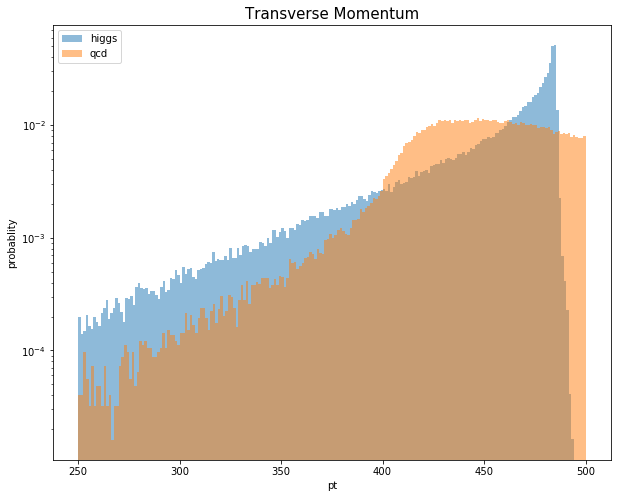

In [42]:
plt.hist(higgs['pt'],bins=200,alpha=0.5,label='higgs',density=True)
plt.hist(qcd['pt'],bins=200,alpha=0.5,label='qcd',density=True)
plt.legend()
plt.xlabel("pt", size=10)
plt.ylabel("probablity",size=10)
plt.title("Transverse Momentum",size=15) 
plt.yscale('log');

Above is showing a log-scale normalized histogram of higgs and qcd counts with transverse momentum being variant. Signal and background data both increase as pt increases. From the plot, we can see that Higgs data contain a spike aroun pt=480. Although the spike does not correspond to a dramatically large probablity in comparison, this may still be used for disintguishing signal and background. In the next stage, we can fit a function for the background and then subtract the hypothetical background from the unlabeled dataset. 

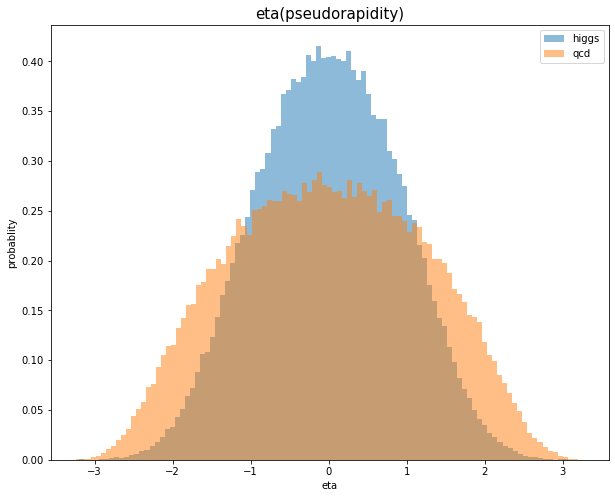

In [31]:
plt.hist(higgs['eta'],bins=100,alpha=0.5,label='higgs',density=True)
plt.hist(qcd['eta'],bins=100,alpha=0.5,label='qcd',density=True)
plt.legend()
plt.xlabel("eta", size=10)
plt.ylabel("probablity",size=10)
plt.title("eta (pseudorapidity)",size=15);

In [37]:
hieta=stats.norm.ppf(stats.norm.cdf(5),scale = np.std(higgs['eta']))
qcdeta=stats.norm.ppf(stats.norm.cdf(5),scale = np.std(qcd['eta']))
print('The 5 sigma threshold of this Higgs distribution is {:.2f}'. format(hieta))
print('The 5 sigma threshold of this QCD distribution is {:.2f}'. format(qcdeta))

The 5 sigma threshold of this Higgs distribution is 4.50
The 5 sigma threshold of this QCD distribution is 6.12


Above is showing a normalized histogram of higgs and qcd counts with pseudorapidity being variant. Signal and background data both appear Gaussian with peak at 0. Since the 5 sigma value of background is even greater than signal, so we cannot simply use the 5 simga method to find signal. However, there is still some discrimination power provided in this case (unshaded blue region in plot). In the next stage, we can subtract the fitted Gaussian for hypothetical background from the unlabeled dataset. 

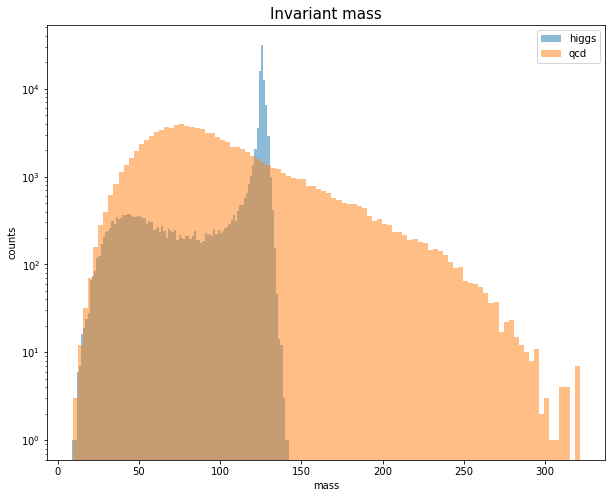

In [40]:
plt.hist(higgs['mass'],bins=100,alpha=0.5,label='higgs',density=True)
plt.hist(qcd['mass'],bins=100,alpha=0.5,label='qcd',density=True)
plt.legend()
plt.xlabel("mass", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("Invariant mass",size=15);

Above is showing a log-scale normalized histogram of higgs and qcd counts with mass being variant. This plot clearly shows a spike at m= 125, which matches with the property of Higgs boson. We can fit a function for both the background and signal, and then subtract the hypothetical background from the unlabeled dataset. After idenitifying the spike in the unlabled dataset, we should be able to identify some Higgs data.

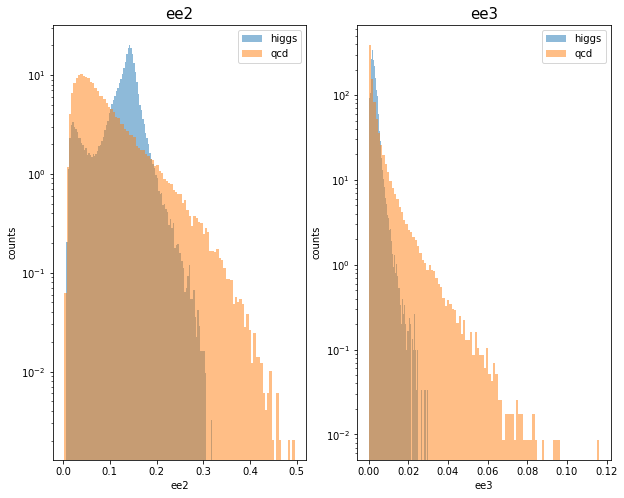

In [45]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.hist(higgs['ee2'],bins=100,alpha=0.5,label='higgs',density=True)
plt.hist(qcd['ee2'],bins=100,alpha=0.5,label='qcd',density=True)
plt.legend()
plt.xlabel("ee2", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("ee2",size=15)
plt.subplot(1,2,2)
plt.hist(higgs['ee3'],bins=100,alpha=0.5,label='higgs',density=True)
plt.hist(qcd['ee3'],bins=100,alpha=0.5,label='qcd',density=True)
plt.legend()
plt.xlabel("ee3", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("ee3",size=15);



Above is showing a log-scale normalized histogram of higgs and qcd counts with ECF being variant. This plot for ee2 shows a Higgs spike at ee2=0.18. This provide some discrimination power. After fitting the data, we should be able to subtract hypothetical background data to get the Higgs peak.
However,in the ee3 plot, signal data is completely overshadowed by the background. Both signal and data seems at peak at zero and decrease as ee3 increases. It is impossible distinguish the signal from ee3.

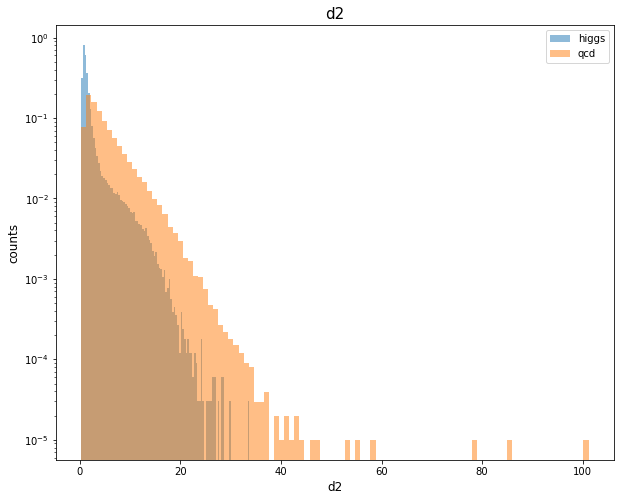

In [46]:
plt.hist(higgs['d2'],bins=100,alpha=0.5,label='higgs',density=True)
plt.hist(qcd['d2'],bins=100,alpha=0.5,label='qcd',density=True)
plt.legend()
plt.xlabel("d2", size=12)
plt.yscale('log')
plt.ylabel("counts",size=12)
plt.title("d2",size=15);



Above is showing a log-scale normalized histogram of higgs and qcd counts with d2 being variant. In this plot, the signal data is almost completely overshadowed by the background. Both signal and data seems at peak close to zero and decrease as d2 increases. It is almost impossible distinguish the signal from d2.

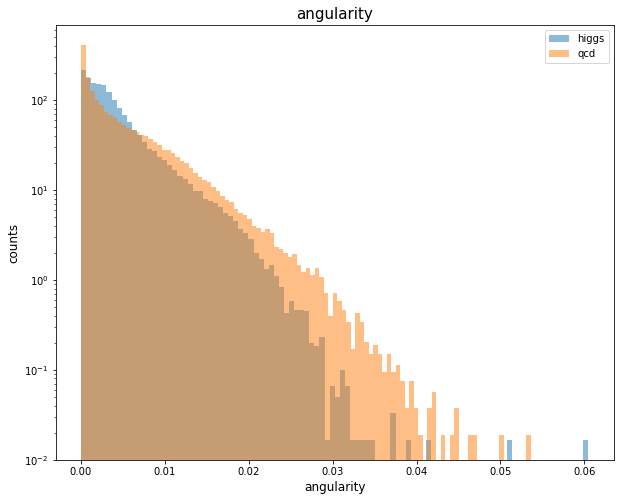

In [47]:
plt.hist(higgs['angularity'],bins=100,alpha=0.5,label='higgs',density=True)
plt.hist(qcd['angularity'],bins=100,alpha=0.5,label='qcd',density=True)
plt.legend()
plt.xlabel("angularity", size=12)
plt.yscale('log')
plt.ylabel("counts",size=12)
plt.title("angularity",size=15);




Above is showing a log-scale normalized histogram of higgs and qcd counts with angularity being variant. In this plot, the signal data is almost completely overshadowed by the background. Both signal and data seems at peak close at zero and decrease as angularity increases. It is almost impossible distinguish the signal from angularity.

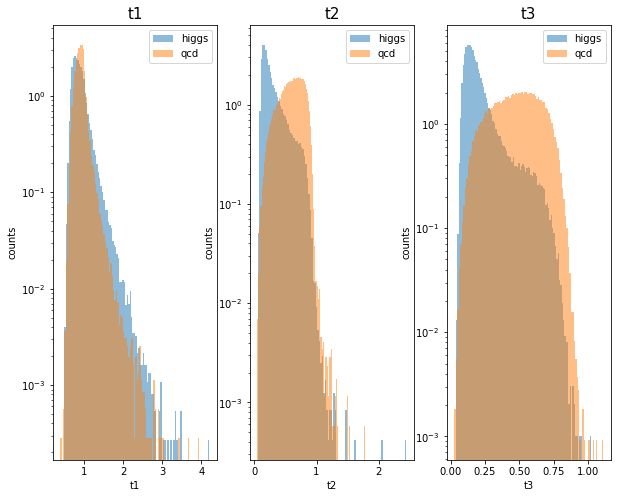

In [48]:
plt.subplots(1,3)
plt.subplot(1,3,1)
plt.hist(higgs['t1'],bins=100,alpha=0.5,label='higgs',density=True)
plt.hist(qcd['t1'],bins=100,alpha=0.5,label='qcd',density=True)
plt.legend()
plt.xlabel("t1", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t1",size=15)

plt.subplot(1,3,2)
plt.hist(higgs['t2'],bins=100,alpha=0.5,label='higgs',density=True)
plt.hist(qcd['t2'],bins=100,alpha=0.5,label='qcd',density=True)
plt.legend()
plt.xlabel("t2", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t2",size=15)

plt.subplot(1,3,3)
plt.hist(higgs['t3'],bins=100,alpha=0.5,label='higgs',density=True)
plt.hist(qcd['t3'],bins=100,alpha=0.5,label='qcd',density=True)
plt.legend()
plt.xlabel("t3", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t3",size=15);




t1: In this plot, the signal data is almost completely overshadowed by the background. Both signal and data seems at peak close at zero and decrease as t1 increases. It is almost impossible distinguish the signal from t1.



t2, t3: Higgs has a spike around zero, which provides discrimination power. We can fit the background and later subtract hypothetical background from the unlabeled dataset.

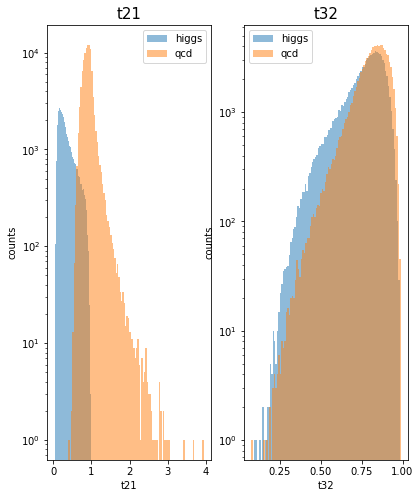

In [76]:
plt.subplots(1,2)
plt.subplot(1,3,1)
plt.hist(higgs['t21'],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['t1'],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("t21", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t21",size=15)

plt.subplot(1,3,2)
plt.hist(higgs['t32'],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['t32'],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("t32", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("t32",size=15);

t21: Higgs and QCD have different peak value. Higgs and background do not seem to correlate. This offers great discrimination power. We can fit the background  to its peak value and later subtract hypothetical background from the unlabeled dataset.

t32: In this plot, the signal data is almost completely overshadowed by the background. Both signal and data seems at peak close at zero and increase as t32 increases. It is almost impossible distinguish the signal from t32.


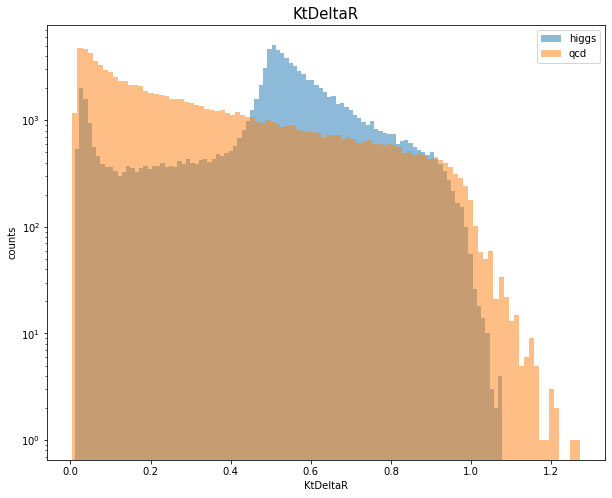

In [80]:

plt.hist(higgs['KtDeltaR'],bins=100,alpha=0.5,label='higgs')
plt.hist(qcd['KtDeltaR'],bins=100,alpha=0.5,label='qcd')
plt.legend()
plt.xlabel("KtDeltaR", size=10)
plt.yscale('log')
plt.ylabel("counts",size=10)
plt.title("KtDeltaR",size=15);



Above is showing a log-scale normalized histogram of higgs and qcd counts with KtDeltaR being variant. SigThis plot shows a Higgs spike at KtDeltaR=0.5. This provide some discrimination power. After fitting the data, we should be able to subtract hypothetical background data to get the Higgs data (the spike).